# Exploratory Data Analysis (EDA) -  Análise Exploratória de Dados
# Predicting housing prices

## Importando os módulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import gridspec
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

## Funções iniciais

In [2]:
#TIRAR NOTAÇÃO CIENTÍFICA
pd.set_option('display.float_format','{:.2f}'.format)

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## Visualização e limpeza dos dados

In [4]:
print('Número de linhas:', df.shape[0])
print('Número de colunas:', df.shape[1],'\n')
print('Tipos das variáveis:','\n', df.dtypes)


Número de linhas: 21613
Número de colunas: 21 

Tipos das variáveis: 
 id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


### Analizando as informações, vemos que a variável date está como 'object', é preciso mudar para 'timedate' para obter as informações de data corretamente.

In [5]:
df['date'] = pd.to_datetime(df['date'])

### Precisamos também verificar se há registros duplicados, se houver, vamos excluir.

In [6]:
df.sort_values('id').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
2496,1000102,2014-09-16,280000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,...,8,1160,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,...,7,1460,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,...,6,1010,420,1930,0,98168,47.48,-122.27,1290,10320


In [7]:
df = df.drop_duplicates(subset = ['id'], keep = 'last')
df.sort_values('id').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,...,8,1160,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,...,7,1460,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,...,6,1010,420,1930,0,98168,47.48,-122.27,1290,10320
3557,3600057,2015-03-19,402500.00,4,2.00,1650,3504,1.00,0,0,...,7,760,890,1951,2013,98144,47.58,-122.29,1480,3504


### Precisamos checar se há valores ausentes no dataset.

In [8]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Questões

In [9]:
# 1. Quais são as casas mais caras ?

df[['price','id','yr_built','condition']].sort_values('price', ascending = False)

#R: A casa mais cara custa $7.700.000

,price,id,yr_built,condition
7252,7700000.00,6762700020,1910,4
3914,7062500.00,9808700762,1940,3
9254,6885000.00,9208900037,2001,3
4411,5570000.00,2470100110,2001,3
1448,5350000.00,8907500070,2009,3
...,...,...,...,...
2141,82500.00,1623049041,1951,2
16198,81000.00,3028200080,1943,1
465,80000.00,8658300340,1912,2
15293,78000.00,40000362,1942,1


In [10]:
# 2. Quais são as casas mais baratas ?

df[['price','id']].sort_values('price', ascending = True)

#R: A casa mais barata custa $75.000.00

,price,id
1149,75000.00,3421079032
15293,78000.00,40000362
465,80000.00,8658300340
16198,81000.00,3028200080
2141,82500.00,1623049041
...,...,...
1448,5350000.00,8907500070
4411,5570000.00,2470100110
9254,6885000.00,9208900037
3914,7062500.00,9808700762


In [11]:
# 3. Quais são as casas com maior número de quartos ?

df[['bedrooms','id','price']].sort_values('bedrooms', ascending = False)

#R:A casa com maior número de quartos é a de ID 1773100755 com 11 quartos 

,bedrooms,id,price
15870,33,2402100895,640000.00
8757,11,1773100755,520000.00
15161,10,5566100170,650000.00
13314,10,627300145,1148000.00
19254,10,8812401450,660000.00
...,...,...,...
3467,0,1453602309,288000.00
4868,0,6896300380,228000.00
12653,0,7849202299,320000.00
875,0,6306400140,1095000.00


In [12]:
# Verifiquei que em bedrooms há 33 quartos, achei estranho, então resolvi mudar somente para 3 quartos

df = df.sort_values(by = 'bedrooms', ascending = False)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.00,33,1.75,1620,6000,1.00,0,0,...,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700
8757,1773100755,2014-08-21,520000.00,11,3.00,3000,4960,2.00,0,0,...,7,2400,600,1918,1999,98106,47.56,-122.36,1420,4960
15161,5566100170,2014-10-29,650000.00,10,2.00,3610,11914,2.00,0,0,...,7,3010,600,1958,0,98006,47.57,-122.17,2040,11914
13314,627300145,2014-08-14,1148000.00,10,5.25,4590,10920,1.00,0,2,...,9,2500,2090,2008,0,98004,47.59,-122.11,2730,10400
19254,8812401450,2014-12-29,660000.00,10,3.00,2920,3745,2.00,0,0,...,7,1860,1060,1913,0,98105,47.66,-122.32,1810,3745


In [13]:
df["bedrooms"].replace({33: 3}, inplace=True)
df['bedrooms'].unique()


array([ 3, 11, 10,  9,  8,  7,  6,  5,  4,  2,  1,  0], dtype=int64)

C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

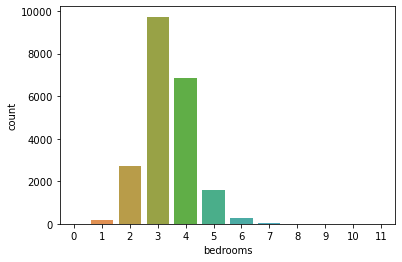

In [14]:
sns.countplot(df.bedrooms)

In [15]:
# 4. Quais são as casas com maior número de banheiros ?

df[['bathrooms','id','price']].sort_values('bathrooms',ascending = False)

#R:A casa com maior número de banheiros é a de ID 6762700020 com 8 banheiros 

,bathrooms,id,price
12777,8.00,1225069038,2280000.00
7252,8.00,6762700020,7700000.00
9254,7.75,9208900037,6885000.00
8546,7.50,424049043,450000.00
8092,6.75,1924059029,4668000.00
...,...,...,...
1149,0.00,3421079032,75000.00
19452,0.00,3980300371,142000.00
5832,0.00,5702500050,280000.00
875,0.00,6306400140,1095000.00


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


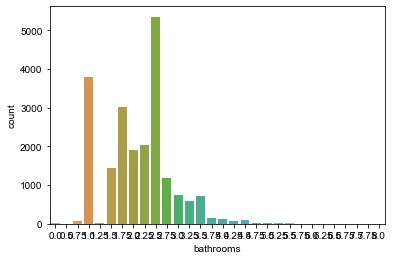

In [16]:
sns.countplot(df.bathrooms)
sns.set(rc={'figure.figsize':(10,10)})

In [17]:
# 5. Quantas casas possuem 2 banheiros?

(df[['bathrooms']] == 2).sum()

# 1913 casas possuem 2 banheiros

bathrooms    1913
dtype: int64

In [18]:
# 6. Qual o menor preço das casas com 1 quarto?

house_1_bedroom = df.loc[(df['price'] > 0) & (df['bedrooms'] == 1), :]
house_1_bedroom['price'].min()

#R:A casa com menor preço com 1 quarto é a de $75.000.0

75000.0

In [19]:
# 7. Qual o maior preço das casas com 1 quarto?

house_1_bedroom = df.loc[(df['price'] > 0) & (df['bedrooms'] == 1), :]
house_1_bedroom['price'].max()

#R:A casa com maior preço com 1 quarto é a de $1.247.000.0


1247000.0

In [20]:
# 8. Quais casas possuem maior sala de estar?

df[['sqft_living','id','price']].sort_values('sqft_living',ascending = False)

,sqft_living,id,price
12777,13540,1225069038,2280000.00
7252,12050,6762700020,7700000.00
3914,10040,9808700762,7062500.00
9254,9890,9208900037,6885000.00
8092,9640,1924059029,4668000.00
...,...,...,...
21332,390,9266700190,245000.00
18379,384,1222029077,265000.00
860,380,1723049033,245000.00
15381,370,2856101479,276000.00


In [21]:
# 9. Qual é o maior número de andar de cada casa?

df[['floors','id','price']].sort_values('floors',ascending = False)

#R: 3.50

,floors,id,price
11594,3.50,3180100023,544000.00
875,3.50,6306400140,1095000.00
14885,3.50,8673400177,525000.00
10077,3.50,1972202010,435000.00
20772,3.50,1972200428,563500.00
...,...,...,...
19333,1.00,7702600930,400000.00
15689,1.00,3826500470,305000.00
19354,1.00,1628700107,383000.00
15885,1.00,5101400461,449000.00


In [22]:
# 10. Quantas casas tem vista para o mar?

df['waterfront'].sum()

#R: 163 casas tem vista pro mar

163

In [23]:
# 11. Das casas com vista para o mar, quantas tem mais de 2 quartos?

house_waterfront = df.loc[(df['waterfront'] > 0) & (df['bedrooms'] > 2)]
house_waterfront['waterfront'].sum()

#R: 127 casas tem vista para o mar e possuem mais de 2 quartos

127

In [24]:
# 12. Qual a casa mais antiga ?

df[['yr_built','id','price']].sort_values('yr_built',ascending = True)

#R: A data mais antiga é 1900

,yr_built,id,price
10600,1900,7011200830,783200.00
1929,1900,2767603215,490000.00
11534,1900,3365900520,192500.00
19319,1900,4083302225,850000.00
10985,1900,452001890,730000.00
...,...,...,...
4154,2015,8077100031,631000.00
14925,2015,2770602360,671000.00
20770,2015,9310300160,357000.00
8425,2015,558100090,628000.00


In [25]:
# 13. Mostre os imoveis reformados

df = df.assign(renovated=(df['yr_renovated'] > 0).astype(int)).sort_values('renovated', ascending = False)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
17666,2902200076,2015-01-28,800000.00,3,3.00,2060,3200,2.00,0,0,...,2060,0,1907,1984,98102,47.64,-122.32,1760,2669,1
8589,7284900405,2014-07-14,775000.00,4,2.50,2880,8400,2.00,0,4,...,2050,830,1955,1987,98177,47.77,-122.39,2880,7440,1
15702,5230000020,2014-06-30,500000.00,4,3.00,3720,15048,3.00,0,0,...,3720,0,1979,2014,98059,47.51,-122.14,2020,15180,1
3252,3343301910,2014-10-20,1000000.00,5,4.50,2120,8944,2.00,1,4,...,2120,0,1939,1963,98006,47.55,-122.20,2870,8944,1
586,7942601895,2014-08-19,640000.00,3,2.50,2160,4000,1.50,0,0,...,1960,200,1903,2013,98122,47.60,-122.31,2160,5120,1


In [26]:
# Quais casas possuem melhores materiais (grade) de acordo com a ordem do ano
# de construção, reforma, preço ?

df[['grade','yr_built','yr_renovated','price']].sort_values('price',ascending = False)

,grade,yr_built,yr_renovated,price
7252,13,1910,1987,7700000.00
3914,11,1940,2001,7062500.00
9254,13,2001,0,6885000.00
4411,13,2001,0,5570000.00
1448,12,2009,0,5350000.00
...,...,...,...,...
2141,5,1951,0,82500.00
16198,5,1943,0,81000.00
465,4,1912,0,80000.00
15293,5,1942,0,78000.00


C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

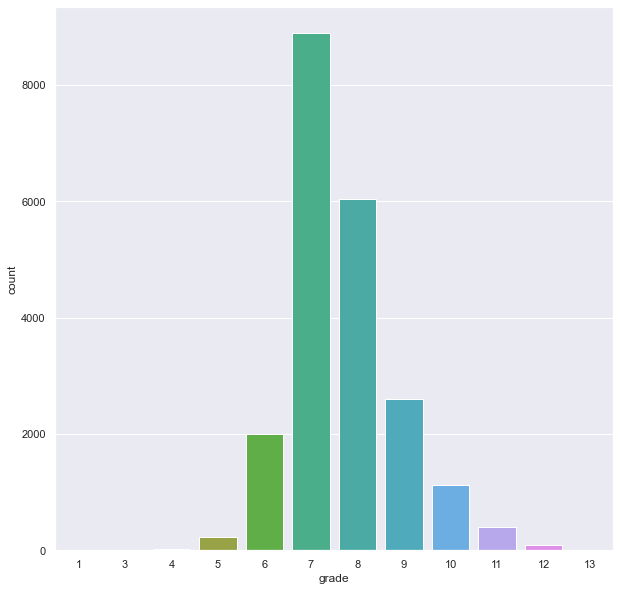

In [27]:
sns.countplot(df.grade)

C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='price'>

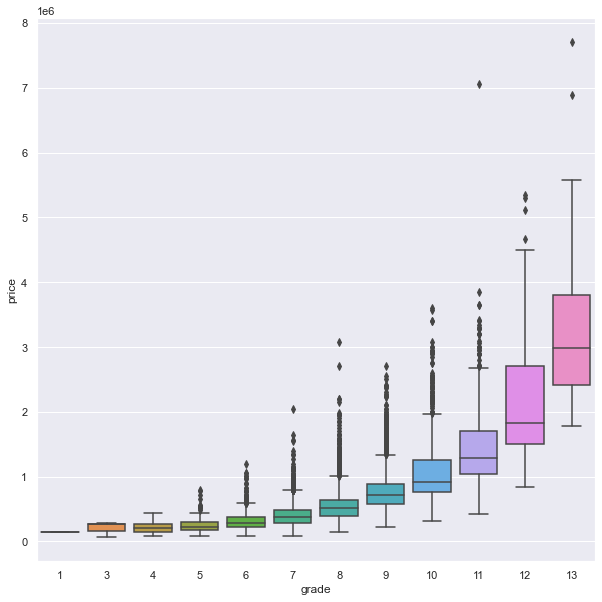

In [28]:
sns.boxplot('grade','price', data = df)

C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='yr_built'>

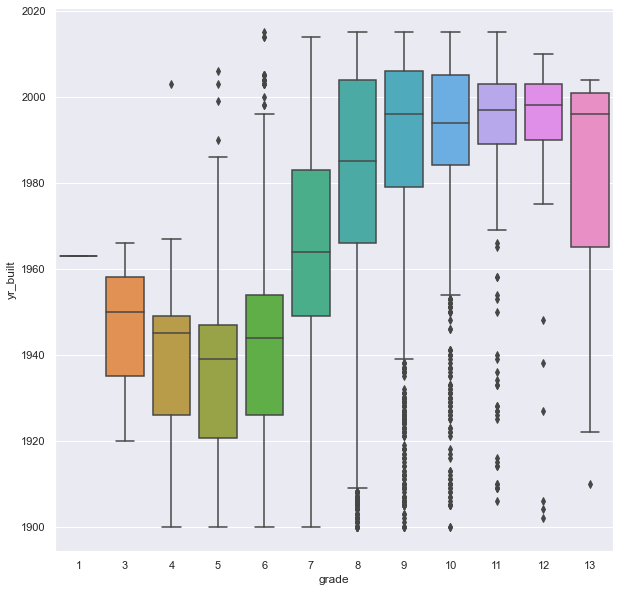

In [29]:
sns.boxplot('grade','yr_built', data = df)

In [30]:
# Quais casas possuem maiores tamanhos da área habitacional(sqft_living) de acordo com a ordem do ano
# de construção, reforma, preço ?

df[['sqft_living','yr_built','yr_renovated','price']].sort_values('price',ascending = False)

,sqft_living,yr_built,yr_renovated,price
7252,12050,1910,1987,7700000.00
3914,10040,1940,2001,7062500.00
9254,9890,2001,0,6885000.00
4411,9200,2001,0,5570000.00
1448,8000,2009,0,5350000.00
...,...,...,...,...
2141,520,1951,0,82500.00
16198,730,1943,0,81000.00
465,430,1912,0,80000.00
15293,780,1942,0,78000.00


In [31]:
renovated = df.groupby('renovated')['price'].count()
renovated

renovated
0    20526
1      910
Name: price, dtype: int64

C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='renovated', ylabel='price'>

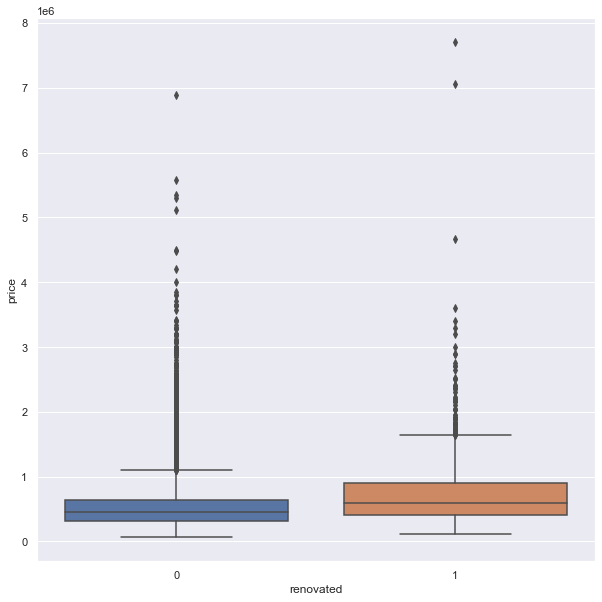

In [32]:
sns.boxplot('renovated','price', data = df)

C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='renovated', ylabel='grade'>

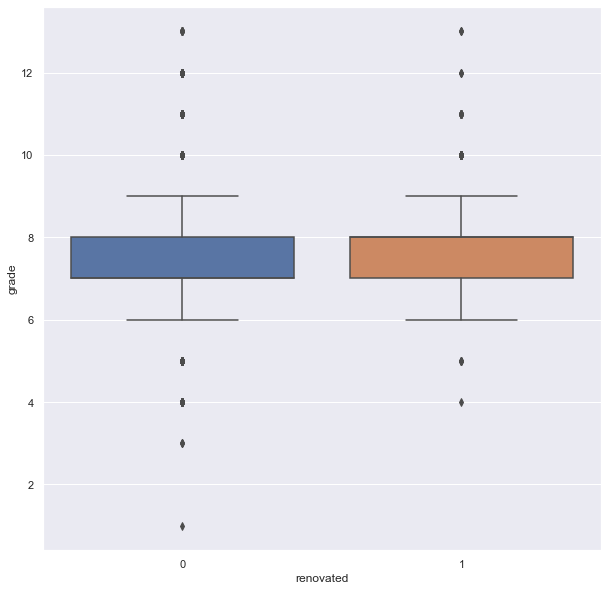

In [33]:
sns.boxplot('renovated','grade', data = df)

### Estatísticas descritivas

In [34]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,...,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00
mean,4580765328.18,541649.96,3.37,2.12,2082.70,15135.64,1.50,0.01,0.24,3.41,...,1790.96,291.74,1971.10,84.73,98077.86,47.56,-122.21,1988.31,12785.96,0.04
std,2876589633.67,367314.93,0.91,0.77,919.15,41538.62,0.54,0.09,0.77,0.65,...,829.03,442.78,29.39,402.43,53.47,0.14,0.14,685.70,27375.47,0.20
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,0.00
25%,2123700078.75,324866.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,...,1200.00,0.00,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,0.00
50%,3904921185.00,450000.00,3.00,2.25,1920.00,7614.00,1.50,0.00,0.00,3.00,...,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,0.00
75%,7308675062.50,645000.00,4.00,2.50,2550.00,10696.25,2.00,0.00,0.00,4.00,...,2220.00,560.00,1997.00,0.00,98117.00,47.68,-122.12,2370.00,10087.25,0.00
max,9900000190.00,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,...,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,1.00


<AxesSubplot:title={'center':'Preço dos Imóveis'}, ylabel='$ milhões'>

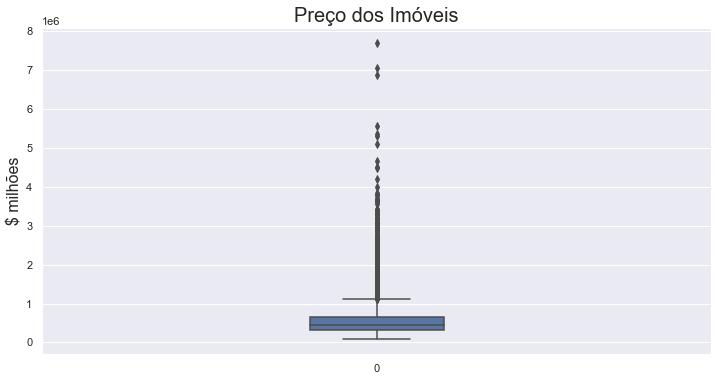

In [35]:
ax = sns.boxplot(data=df['price'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$ milhões', fontsize=16)
ax

C:\Users\Rafa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


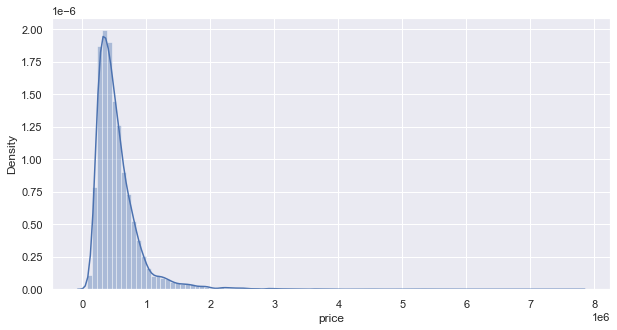

In [36]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df["price"], bins = 100)

### Há um desvio-padrão muito grande, já podemos identificar vários outliers. Olhe a diferença entre o imóvel do Q1 (quartil 1) que custa 75.000 e o imóvel do Q3 (quartil 3) que custa 645.000, e o do valor máximo de 7.700.000.

## Criei uma classificação para os imóveis, separando-os em 'baixo e alto padrão' de acordo com o preço

In [37]:
df['class'] =  'media'
df.loc[df['price'] > 541649.96, 'class'] = 'alto'
df.loc[df['price'] < 541649.96, 'class'] = 'medio'
df.loc[df['price'] < 324866.00, 'class'] = 'baixo'
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,class
17666,2902200076,2015-01-28,800000.00,3,3.00,2060,3200,2.00,0,0,...,0,1907,1984,98102,47.64,-122.32,1760,2669,1,alto
8589,7284900405,2014-07-14,775000.00,4,2.50,2880,8400,2.00,0,4,...,830,1955,1987,98177,47.77,-122.39,2880,7440,1,alto
15702,5230000020,2014-06-30,500000.00,4,3.00,3720,15048,3.00,0,0,...,0,1979,2014,98059,47.51,-122.14,2020,15180,1,medio
3252,3343301910,2014-10-20,1000000.00,5,4.50,2120,8944,2.00,1,4,...,0,1939,1963,98006,47.55,-122.20,2870,8944,1,alto
586,7942601895,2014-08-19,640000.00,3,2.50,2160,4000,1.50,0,0,...,200,1903,2013,98122,47.60,-122.31,2160,5120,1,alto
5760,623059016,2014-07-17,1100000.00,4,3.25,3190,11774,2.00,1,4,...,580,1956,1991,98178,47.50,-122.22,2240,8725,1,alto
1084,6114600030,2014-05-20,675000.00,4,3.00,2690,28300,1.00,0,0,...,0,1954,1999,98166,47.45,-122.34,2820,27100,1,alto
9323,3536900110,2014-10-09,1362500.00,3,2.00,2310,21318,1.00,0,0,...,0,1979,1996,98004,47.64,-122.22,2950,21814,1,alto
9382,179001425,2014-10-24,230000.00,3,1.75,1420,3000,1.00,0,0,...,710,1931,2014,98178,47.49,-122.27,1960,5000,1,baixo
8483,3491300082,2015-01-27,799990.00,4,3.50,2540,5808,2.00,0,0,...,720,1910,1986,98117,47.69,-122.38,1520,5461,1,alto


## Criei uma nova coluna chamada 'dormitory_type' e dividi os imóveis em apartamento e casa

In [38]:
df.loc[df['bedrooms'] <= 1, 'dormitory_type'] = 'kitnet'
df.loc[df['bedrooms'] == 2, 'dormitory_type'] = 'apartment'
df.loc[df['bedrooms'] > 2, 'dormitory_type'] = 'house_and_apartment'

## Mapa - Imóveis classificação: alto, médio e baixo padrão.

In [39]:
#import plotly.express as px

#data_map = df[['id', 'lat', 'long', 'price', 'class']]

#mapa = px.scatter_mapbox(data_map, lat = 'lat', lon = 'long', hover_name = 'id', hover_data = ['price'] ,
                  #height = 300 , zoom = 10, color = 'class', size = 'price')

#mapa.update_layout (mapbox_style = 'open-street-map')

#mapa.update_layout(height = 600, margin = {'r':0,'t':0,'l':0,'b':0} )

## A maior parte dos imóveis são de classe média e baixa

## Mapa - Tipo de imóvel (Casa, Apartamento, Kitnet)
### obs: house_and_apartment = 2+ dormitórios
###          apartment = 2 dormitórios
###          kitnet = 0 dormitórios


In [40]:
#import plotly.express as px

#data_map = df[['id', 'lat', 'long', 'price', 'dormitory_type']]

#mapa = px.scatter_mapbox(data_map, lat = 'lat', lon = 'long', hover_name = 'id', hover_data = ['price'] ,
                  #height = 300 , zoom = 10, color = 'dormitory_type', size = 'price')

#mapa.update_layout (mapbox_style = 'open-street-map')

#mapa.update_layout(height = 600, margin = {'r':0,'t':0,'l':0,'b':0} )

## A maior parte dos imóveis são casas ou apartamentos grandes, ou seja, com mais de 2 dormitórios.

## Mapa - mostrando os imóveis com relação de qualidade dos materiais (grade).

In [41]:
#import plotly.express as px

#data_map = df[['id', 'lat', 'long', 'price', 'grade']]

#mapa = px.scatter_mapbox(data_map, lat = 'lat', lon = 'long', hover_name = 'id', hover_data = ['price'] ,
                  #height = 300 , zoom = 10, color = 'grade', size = 'price')

#mapa.update_layout (mapbox_style = 'open-street-map')

#mapa.update_layout(height = 600, margin = {'r':0,'t':0,'l':0,'b':0} )

## Mapa - mostrando os imóveis com relação de preço e reforma.

In [42]:
#import plotly.express as px

#data_map = df[['id', 'lat', 'long', 'price', 'renovated']]

#mapa = px.scatter_mapbox(data_map, lat = 'lat', lon = 'long', hover_name = 'id', hover_data = ['price'] ,
                  #height = 300 , zoom = 10, color = 'renovated', size = 'price')

#mapa.update_layout (mapbox_style = 'open-street-map')

#mapa.update_layout(height = 600, margin = {'r':0,'t':0,'l':0,'b':0} )

### A maior parte dos imóveis não foram reformados.

## Mapa - mostrando os imóveis com relação de tamanho da área habitacional (sqft_living)

In [43]:
#import plotly.express as px

#data_map = df[['id', 'lat', 'long', 'price', 'sqft_living']]

#mapa = px.scatter_mapbox(data_map, lat = 'lat', lon = 'long', hover_name = 'id', hover_data = ['price'] ,
                  #height = 300 , zoom = 10, color = 'sqft_living', size = 'price')

#mapa.update_layout (mapbox_style = 'open-street-map')

#mapa.update_layout(height = 600, margin = {'r':0,'t':0,'l':0,'b':0} )

## Mapa - mostrando os imóveis com relação de pés acima do solo (sqft_above)

In [44]:
import plotly.express as px

data_map = df[['id', 'lat', 'long', 'price', 'sqft_above']]

mapa = px.scatter_mapbox(data_map, lat = 'lat', lon = 'long', hover_name = 'id', hover_data = ['price'] ,
                  height = 300 , zoom = 10, color = 'sqft_above', size = 'price')

mapa.update_layout (mapbox_style = 'open-street-map')

mapa.update_layout(height = 600, margin = {'r':0,'t':0,'l':0,'b':0} )

## Correlação

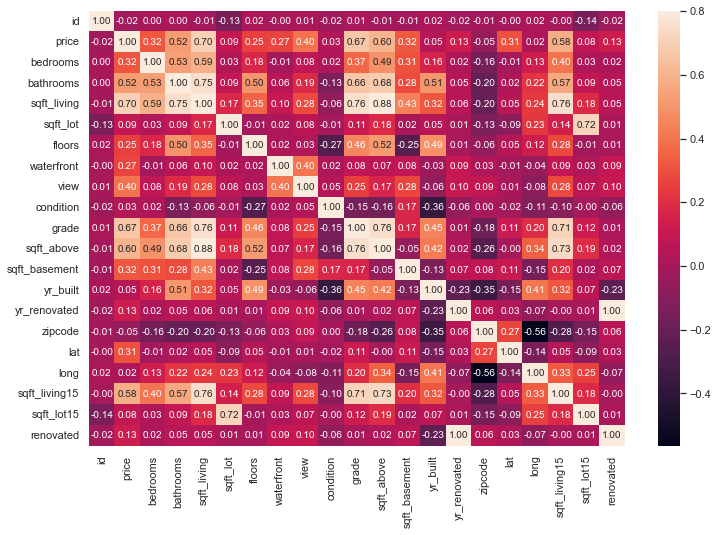

In [45]:
matrix = df.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize = (12,8))
sns.heatmap(matrix, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f')
plt.show()

In [46]:
dfSemId = df._get_numeric_data()
dfSemId.drop('id', 1, inplace=True)
dfSemId.head()
dfSemIdCorr = dfSemId.corr()
dfSemIdCorr['price'].sort_values(ascending = False).round(3)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.60
sqft_living15    0.58
bathrooms        0.52
view             0.40
sqft_basement    0.32
bedrooms         0.32
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
renovated        0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
zipcode         -0.05
Name: price, dtype: float64

### bathrooms, sqft_living, grade, sqft_above e sqft_living15 possuem forte correlação positiva, isso significa que possivelmente essas features aumentam o preço de venda.

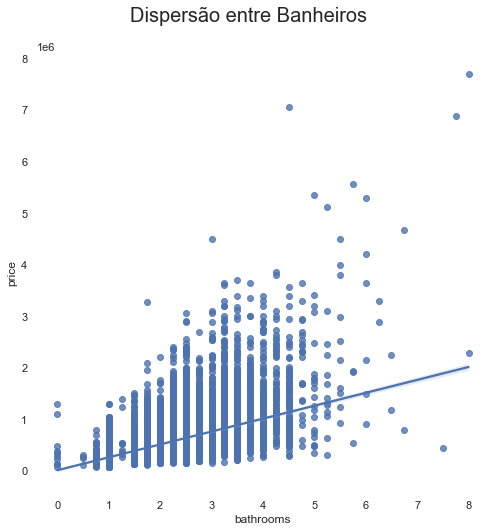

In [47]:
ax = sns.pairplot(df, y_vars='price', x_vars=['bathrooms'], kind='reg', height = 7)
ax.fig.suptitle('Dispersão entre Banheiros', fontsize=20, y=1.05)
ax

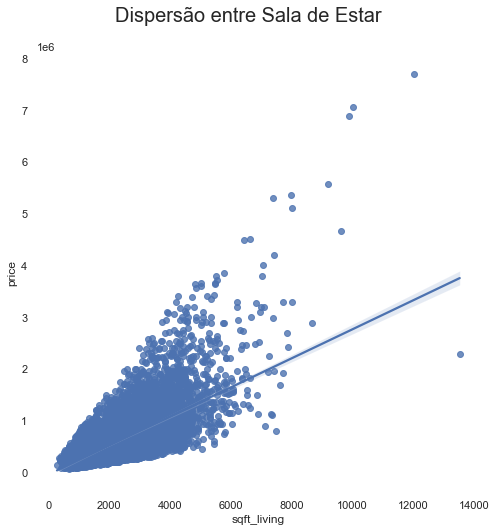

In [48]:
ax = sns.pairplot(df, y_vars='price', x_vars=['sqft_living'], kind='reg', height = 7)
ax.fig.suptitle('Dispersão entre Sala de Estar', fontsize=20, y=1.05)
ax

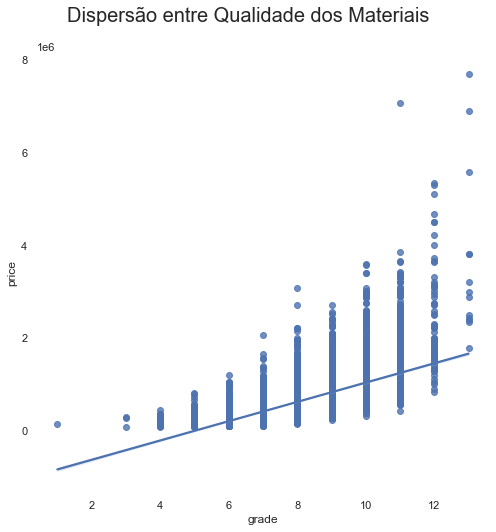

In [49]:
ax = sns.pairplot(df, y_vars='price', x_vars=['grade'], kind='reg', height = 7)
ax.fig.suptitle('Dispersão entre Qualidade dos Materiais', fontsize=20, y=1.05)
ax

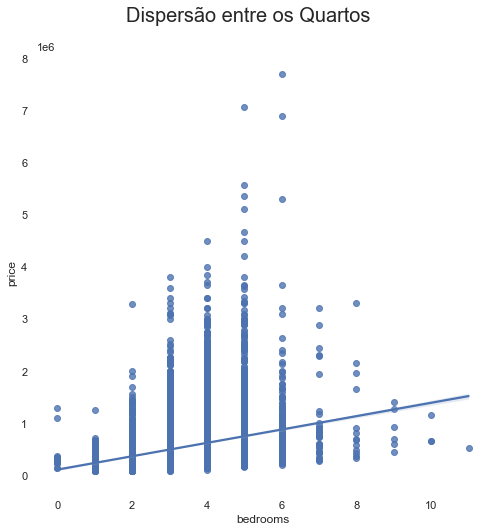

In [50]:
ax = sns.pairplot(df, y_vars='price', x_vars=['bedrooms'], kind='reg', height = 7)
ax.fig.suptitle('Dispersão entre os Quartos', fontsize=20, y=1.05)
ax

### Quis analizar a medida dos preços com relação aos quartos, a partir de 6 quartos esse valor tende a cair, o que pode significar que o número de quartos a partir de 6 não tem tanta influência no preço.

In [51]:
df['month'] = df['date'].apply(lambda date:date.month) #criando uma nova coluna de mês
df['year'] = df['date'].apply(lambda date:date.year) #criando uma nova coluna de ano
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15' 'renovated' 'class' 'dormitory_type' 'month'
 'year']


[Text(0.5, 0, 'Mês'),
 Text(0, 0.5, 'Preço'),
 Text(0.5, 1.0, 'Preços dos imóveis durante o ano')]

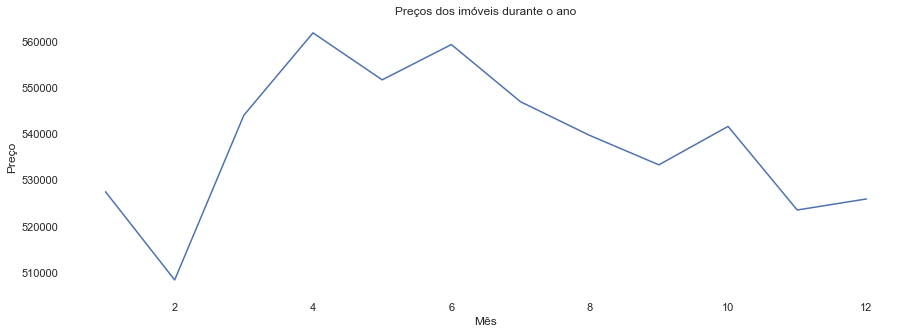

In [52]:
f, axe = plt.subplots(1, 1, figsize = (15,5))
df.groupby('month').mean()['price'].plot()
sns.despine(left = True, bottom = True)
axe.set(xlabel = 'Mês', ylabel = 'Preço', title = 'Preços dos imóveis durante o ano')

In [53]:
df.groupby('month')['price'].count()


month
1      973
2     1247
3     1875
4     2231
5     2393
6     2153
7     2187
8     1914
9     1750
10    1856
11    1398
12    1459
Name: price, dtype: int64

In [54]:

df = df.assign(preco_de_venda = (df['price'] * 1.30)).sort_values('preco_de_venda', ascending = True)
df.head()

#df = df.assign(renovated=(df['yr_renovated'] > 0).astype(int)).sort_values('renovated', ascending = False)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,renovated,class,dormitory_type,month,year,preco_de_venda
1149,3421079032,2015-02-17,75000.00,1,0.00,670,43377,1.00,0,0,...,47.26,-121.91,1160,42882,0,baixo,kitnet,2,2015,97500.00
15293,40000362,2014-05-06,78000.00,2,1.00,780,16344,1.00,0,0,...,47.47,-122.28,1700,10387,0,baixo,apartment,5,2014,101400.00
465,8658300340,2014-05-23,80000.00,1,0.75,430,5050,1.00,0,0,...,47.65,-121.91,1200,7500,0,baixo,kitnet,5,2014,104000.00
16198,3028200080,2015-03-24,81000.00,2,1.00,730,9975,1.00,0,0,...,47.48,-122.31,860,9000,0,baixo,apartment,3,2015,105300.00
2141,1623049041,2014-05-08,82500.00,2,1.00,520,22334,1.00,0,0,...,47.48,-122.30,1572,10570,0,baixo,apartment,5,2014,107250.00


### 1. Quais casas deveriam ser compradas, por qual preço de compra e em qual época do ano?

- Imóveis com (grade) entre 7 e 8
- Imóveis com 2 a 5 quartos
- Imóveis com valores de padrão médio, de 250.000,00 até 541.649,96
- Imóveis com 2 banheiros
- De Abril até Junho são meses bons para comprar os imóveis. 
